In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
df = pd.read_csv("../outputs/example_summary.csv")
df.head()

,subject_id,rest_vo2_ml_min,run_vo2_ml_min,rest_vco2_ml_min,run_vco2_ml_min,net_vo2_ml_min,net_vco2_ml_min,running_economy_ml_kg_min,net_metabolic_power_Wkg,speed_m_per_s
0,P01,385.0,2060.8,330.6,1808.8,1675.8,1478.2,23.536517,8.064477,3.597991
1,P02,352.8,1674.8,299.8,1480.4,1322.0,1180.6,20.030303,6.879613,3.388622
2,P03,379.0,2292.0,315.8,2020.6,1913.0,1704.8,21.689342,7.446370,3.396850
3,P04,310.0,2069.6,261.2,1817.4,1759.6,1556.2,24.853107,8.519922,3.794655
4,P05,329.6,2172.8,276.8,1915.4,1843.2,1638.6,21.137615,7.253506,3.115574


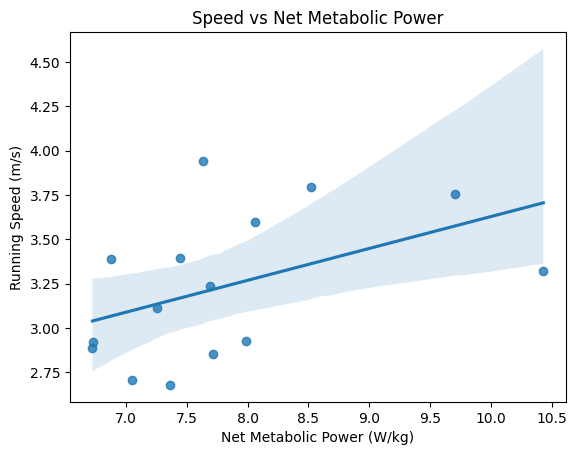

In [4]:
sns.regplot(
    data=df,
    x="net_metabolic_power_Wkg",
    y="speed_m_per_s",
    ci=95
)
plt.xlabel("Net Metabolic Power (W/kg)")
plt.ylabel("Running Speed (m/s)")
plt.title("Speed vs Net Metabolic Power")
plt.show()

In [5]:
X = sm.add_constant(df["net_metabolic_power_Wkg"])
y = df["speed_m_per_s"]

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          speed_m_per_s   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     3.574
Date:                Fri, 05 Dec 2025   Prob (F-statistic):             0.0812
Time:                        14:25:52   Log-Likelihood:                -5.4816
No. Observations:                  15   AIC:                             14.96
Df Residuals:                      13   BIC:                             16.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.8323      0.749      2.448      0.029       0.215       3.449
net_metabolic_power_Wkg     0.1796      0.095      1.891      0.081      -0.026       0.385
==============================================================================
Omnibus:                        0.895   Durbin-Watson:                   0.830
Prob(Omnibus):                  0.639   Jarque-Bera (JB):                0.823
Skew:                           0.397   Prob(JB):                        0.663
Kurtosis:                       2.171   Cond. No.                         62.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# Save the regression scatter plot
sns.regplot(
    data=df,
    x="net_metabolic_power_Wkg",
    y="speed_m_per_s",
    ci=95
)

plt.xlabel("Net Metabolic Power (W/kg)")
plt.ylabel("Running Speed (m/s)")
plt.title("Speed vs Net Metabolic Power")
plt.tight_layout()
plt.savefig("../outputs/speed_vs_metabolic_power_regression.png",
            dpi=300)
plt.close()


# Save regression coefficient summary
coef_table = pd.DataFrame({
    "coefficient": model.params,
    "CI_lower": model.conf_int()[0],
    "CI_upper": model.conf_int()[1],
    "p_value": model.pvalues
})

coef_table.to_csv("../outputs/speed_vs_metabolic_power_summary.csv")

coef_table

,coefficient,CI_lower,CI_upper,p_value
const,1.832263,0.215030,3.449497,0.029344
net_metabolic_power_Wkg,0.179595,-0.025637,0.384826,0.081189
